In [1]:
#Import packages
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
import xgboost as xgb
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler




We start with importing all training sets and test sets, including the extra test sets.

In [2]:
#Import the following
#'feature_set_1_train.csv'
#'feature_set_1_test.csv'
#'feature_set_2_train.csv
#'feature_set_2_test.csv'
#'feature_set_3_textblob_train.csv', 
#'feature_set_3_textblob_test.csv', 
#'feature_set_3_vader_train.csv'
#'feature_set_3_vader_test.csv
#'feature_set_4_textblob_train.csv'
#'feature_set_4_textblob_test.csv'
#'feature_set_4_vader_train.csv'
#'feature_set_4_vader_test.csv'

#Load the data
df1_train = pd.read_csv('feature_set_1_train.csv')
df1_test = pd.read_csv('feature_set_1_test.csv')
df2_train = pd.read_csv('feature_set_2_train.csv')
df2_test = pd.read_csv('feature_set_2_test.csv')
df3_textblob_train = pd.read_csv('feature_set_3_textblob_train.csv')
df3_textblob_test = pd.read_csv('feature_set_3_textblob_test.csv')
df3_vader_train = pd.read_csv('feature_set_3_vader_train.csv')
df3_vader_test = pd.read_csv('feature_set_3_vader_test.csv')
df4_textblob_train = pd.read_csv('feature_set_4_textblob_train.csv')
df4_textblob_test = pd.read_csv('feature_set_4_textblob_test.csv')
df4_vader_train = pd.read_csv('feature_set_4_vader_train.csv')
df4_vader_test = pd.read_csv('feature_set_4_vader_test.csv')

#Import the extra Test sets 
#'extra_test_set_feature_set1.csv'  
#'extra_test_set_feature_set2.csv'
#'extra_test_set_feature_set3_textblob.csv'
#'extra_test_set_feature_set3_vader.csv'
#'extra_test_set_feature_set4_textblob.csv'
#'extra_test_set_feature_set4_vader.csv'

#Load the data
extra_test_set_feature_set1 = pd.read_csv('extra_test_set_feature_set1.csv')
extra_test_set_feature_set2 = pd.read_csv('extra_test_set_feature_set2.csv')
extra_test_set_feature_set3_textblob = pd.read_csv('extra_test_set_feature_set3_textblob.csv')
extra_test_set_feature_set3_vader = pd.read_csv('extra_test_set_feature_set3_vader.csv')
extra_test_set_feature_set4_textblob = pd.read_csv('extra_test_set_feature_set4_textblob.csv')
extra_test_set_feature_set4_vader = pd.read_csv('extra_test_set_feature_set4_vader.csv')





In [3]:
#Show the shape of the data
print(df1_train.shape)
print(df1_test.shape)
print(df2_train.shape)
print(df2_test.shape)
print(df3_textblob_train.shape)
print(df3_textblob_test.shape)
print(df3_vader_train.shape)
print(df3_vader_test.shape)
print(df4_textblob_train.shape)
print(df4_textblob_test.shape)
print(df4_vader_train.shape)
print(df4_vader_test.shape)
print(extra_test_set_feature_set1.shape)
print(extra_test_set_feature_set2.shape)
print(extra_test_set_feature_set3_textblob.shape)
print(extra_test_set_feature_set3_vader.shape)
print(extra_test_set_feature_set4_textblob.shape)
print(extra_test_set_feature_set4_vader.shape)


(181678, 97)
(20187, 97)
(181678, 108)
(20187, 108)
(181678, 112)
(20187, 112)
(181678, 112)
(20187, 112)
(181678, 16)
(20187, 16)
(181678, 16)
(20187, 16)
(16450, 98)
(16450, 109)
(16450, 113)
(16450, 113)
(16450, 17)
(16450, 17)


In [4]:
#Drop id columns from extra test sets
extra_test_set_feature_set1 = extra_test_set_feature_set1.drop(columns = ['id'])
extra_test_set_feature_set2 = extra_test_set_feature_set2.drop(columns = ['id'])
extra_test_set_feature_set3_textblob = extra_test_set_feature_set3_textblob.drop(columns = ['id'])
extra_test_set_feature_set3_vader = extra_test_set_feature_set3_vader.drop(columns = ['id'])
extra_test_set_feature_set4_textblob = extra_test_set_feature_set4_textblob.drop(columns = ['id'])
extra_test_set_feature_set4_vader = extra_test_set_feature_set4_vader.drop(columns = ['id'])

In [5]:
df3_vader_test.columns

Index(['topic_0_average_sentiment', 'topic_1_average_sentiment',
       'topic_2_average_sentiment', 'topic_3_average_sentiment',
       'average_word_count', 'number_of_reviews', 'number_of_reviews_l30d',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin',
       ...
       'Pets allowed', 'Drying rack for clothing', 'Oven',
       'Books and reading material', 'Free street parking', 'Patio or balcony',
       'Stove', 'Clothing storage', 'Bidet', 'distance_to_center'],
      dtype='object', length=112)

Check the baseline for the extra test set

In [6]:
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ensure reproducibility
RANDOM_SEED = 42

# Function to calculate and print RMSE of predicting the mean price on test data
def evaluate_mean_prediction(train, test, extra_test):
    mean_price = train['price'].mean()
    rmse_test = np.sqrt(mean_squared_error(test['price'], [mean_price] * len(test)))
    rmse_extra_test = np.sqrt(mean_squared_error(extra_test['price'], [mean_price] * len(extra_test)))
    print(f"Mean Price: {mean_price:.2f}")
    print(f"RMSE on Test Data: {rmse_test:.3f}")
    print(f"RMSE on Extra Test Data: {rmse_extra_test:.3f}")

# Evaluate mean price RMSE for each feature set
# Feature Set 1
evaluate_mean_prediction(df1_train, df1_test, extra_test_set_feature_set1)

# Feature Set 2
evaluate_mean_prediction(df2_train, df2_test, extra_test_set_feature_set2)

# Feature Set 3 - TextBlob
evaluate_mean_prediction(df3_textblob_train, df3_textblob_test, extra_test_set_feature_set3_textblob)

# Feature Set 3 - VADER
evaluate_mean_prediction(df3_vader_train, df3_vader_test, extra_test_set_feature_set3_vader)

# Feature Set 4 - TextBlob
evaluate_mean_prediction(df4_textblob_train, df4_textblob_test, extra_test_set_feature_set4_textblob)

# Feature Set 4 - VADER
evaluate_mean_prediction(df4_vader_train, df4_vader_test, extra_test_set_feature_set4_vader)



Mean Price: 5.04
RMSE on Test Data: 0.699
RMSE on Extra Test Data: 0.800
Mean Price: 5.04
RMSE on Test Data: 0.699
RMSE on Extra Test Data: 0.800
Mean Price: 5.04
RMSE on Test Data: 0.699
RMSE on Extra Test Data: 0.800
Mean Price: 5.04
RMSE on Test Data: 0.699
RMSE on Extra Test Data: 0.800
Mean Price: 5.04
RMSE on Test Data: 0.699
RMSE on Extra Test Data: 0.800
Mean Price: 5.04
RMSE on Test Data: 0.699
RMSE on Extra Test Data: 0.800


Hyperparameter tuned replication model test results

We have four different feature sets, for which we have the results on the basic test set and on the extra test set

In [7]:
#Model 1
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Scale training data only
scaler = StandardScaler()
features_train_1 = scaler.fit_transform(df1_train.drop(columns=['price']))
target_train_1 = df1_train['price']

# Save test data scaled for future analysis
features_test_1 = scaler.transform(df1_test.drop(columns=['price']))
target_test_1 = df1_test['price']

extra_test_features_1 = scaler.transform(extra_test_set_feature_set1.drop(columns=['price']))
extra_test_target_1 = extra_test_set_feature_set1['price']

# Linear Regression evaluation
linear_model = LinearRegression()
linear_model.fit(features_train_1, target_train_1)

# Evaluate Linear Regression on Test Set 1
test_1_predictions_lr = linear_model.predict(features_test_1)
test_1_rmse_lr = np.sqrt(mean_squared_error(target_test_1, test_1_predictions_lr))
test_1_r2_lr = r2_score(target_test_1, test_1_predictions_lr)

print("\nLinear Regression on Test Set 1:")
print(f"RMSE: {test_1_rmse_lr:.3f}, R-squared: {test_1_r2_lr:.3f}")

# Evaluate Linear Regression on Extra Test Set
extra_test_predictions_lr = linear_model.predict(extra_test_features_1)
extra_test_rmse_lr = np.sqrt(mean_squared_error(extra_test_target_1, extra_test_predictions_lr))
extra_test_r2_lr = r2_score(extra_test_target_1, extra_test_predictions_lr)

print("\nLinear Regression on Extra Test Set:")
print(f"RMSE: {extra_test_rmse_lr:.3f}, R-squared: {extra_test_r2_lr:.3f}")

# Train the final model on all training data with optimized hyperparameters
best_xgb = XGBRegressor(
    learning_rate=0.1,
    max_depth=8,
    n_estimators=1200,
    subsample=1.0,
    random_state=42
)
best_xgb.fit(features_train_1, target_train_1)

# Evaluate on Test Set 1
test_1_predictions = best_xgb.predict(features_test_1)
test_1_rmse = np.sqrt(mean_squared_error(target_test_1, test_1_predictions))
test_1_r2 = r2_score(target_test_1, test_1_predictions)

print("\nTest Set 1:")
print(f"RMSE: {test_1_rmse:.3f}, R-squared: {test_1_r2:.3f}")

# Evaluate on Extra Test Set
extra_test_predictions = best_xgb.predict(extra_test_features_1)
extra_test_rmse = np.sqrt(mean_squared_error(extra_test_target_1, extra_test_predictions))
extra_test_r2 = r2_score(extra_test_target_1, extra_test_predictions)

print("\nExtra Test Set:")
print(f"RMSE: {extra_test_rmse:.3f}, R-squared: {extra_test_r2:.3f}")

# Save predictions and true values for error analysis
error_analysis = {
    'test_1': pd.DataFrame({
        'true_values': target_test_1,
        'predictions': test_1_predictions
    }),
    'extra_test': pd.DataFrame({
        'true_values': extra_test_target_1,
        'predictions': extra_test_predictions
    })
}

# Save the error analysis data for further inspection
error_analysis['test_1'].to_csv('test_set_1_error_analysis.csv', index=False)
error_analysis['extra_test'].to_csv('extra_test_set_error_analysis.csv', index=False)


Linear Regression on Test Set 1:
RMSE: 0.466, R-squared: 0.556

Linear Regression on Extra Test Set:
RMSE: 0.489, R-squared: 0.504

Test Set 1:
RMSE: 0.314, R-squared: 0.799

Extra Test Set:
RMSE: 0.787, R-squared: -0.283


Show feature importance for set 1

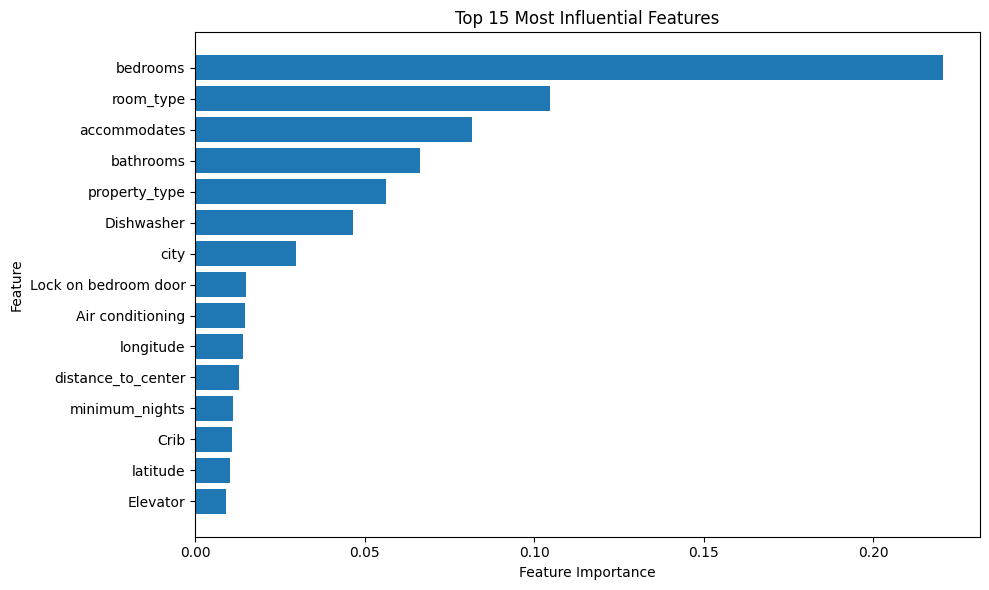

In [21]:
import matplotlib.pyplot as plt

# Assuming df1_train.columns[1:] corresponds to the feature names
feature_names = df1_train.drop(columns=['price']).columns

# Get feature importances from the trained XGBRegressor model
feature_importances = best_xgb.feature_importances_

# Create a DataFrame to store feature names and their importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).head(15)

# Plot the 15 most influential features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Most Influential Features')
plt.gca().invert_yaxis()  # Reverse the order for a better visual effect
plt.tight_layout()
plt.show()


In [8]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Scale training data only for Feature Set 2
scaler = StandardScaler()
features_train_2 = scaler.fit_transform(df2_train.drop(columns=['price']))
target_train_2 = df2_train['price']

# Save test data scaled for future analysis
features_test_2 = scaler.transform(df2_test.drop(columns=['price']))
target_test_2 = df2_test['price']

extra_test_features_2 = scaler.transform(extra_test_set_feature_set2.drop(columns=['price']))
extra_test_target_2 = extra_test_set_feature_set2['price']

# Linear Regression evaluation for Feature Set 2
linear_model = LinearRegression()
linear_model.fit(features_train_2, target_train_2)

# Evaluate Linear Regression on Test Set 2
test_2_predictions_lr = linear_model.predict(features_test_2)
test_2_rmse_lr = np.sqrt(mean_squared_error(target_test_2, test_2_predictions_lr))
test_2_r2_lr = r2_score(target_test_2, test_2_predictions_lr)

print("\nLinear Regression on Test Set 2:")
print(f"RMSE: {test_2_rmse_lr:.2f}, R-squared: {test_2_r2_lr:.2f}")

# Evaluate Linear Regression on Extra Test Set for Feature Set 2
extra_test_predictions_lr_2 = linear_model.predict(extra_test_features_2)
extra_test_rmse_lr_2 = np.sqrt(mean_squared_error(extra_test_target_2, extra_test_predictions_lr_2))
extra_test_r2_lr_2 = r2_score(extra_test_target_2, extra_test_predictions_lr_2)

print("\nLinear Regression on Extra Test Set 2:")
print(f"RMSE: {extra_test_rmse_lr_2:.2f}, R-squared: {extra_test_r2_lr_2:.2f}")

# Train the final XGBoost model on all training data for Feature Set 2
best_xgb_2 = XGBRegressor(
    learning_rate=0.1,
    max_depth=8,
    n_estimators=1200,
    subsample=1.0,
    random_state=42
)
best_xgb_2.fit(features_train_2, target_train_2)

# Evaluate XGBoost on Test Set 2
test_2_predictions = best_xgb_2.predict(features_test_2)
test_2_rmse = np.sqrt(mean_squared_error(target_test_2, test_2_predictions))
test_2_r2 = r2_score(target_test_2, test_2_predictions)

print("\nTest Set 2:")
print(f"RMSE: {test_2_rmse:.3f}, R-squared: {test_2_r2:.3f}")

# Evaluate XGBoost on Extra Test Set for Feature Set 2
extra_test_predictions_2 = best_xgb_2.predict(extra_test_features_2)
extra_test_rmse_2 = np.sqrt(mean_squared_error(extra_test_target_2, extra_test_predictions_2))
extra_test_r2_2 = r2_score(extra_test_target_2, extra_test_predictions_2)

print("\nExtra Test Set 2:")
print(f"RMSE: {extra_test_rmse_2:.3f}, R-squared: {extra_test_r2_2:.3f}")

# Save predictions and true values for error analysis for Feature Set 2
error_analysis_2 = {
    'test_2': pd.DataFrame({
        'true_values': target_test_2,
        'predictions': test_2_predictions
    }),
    'extra_test_2': pd.DataFrame({
        'true_values': extra_test_target_2,
        'predictions': extra_test_predictions_2
    })
}

# Save the error analysis data for further inspection
error_analysis_2['test_2'].to_csv('test_set_2_error_analysis.csv', index=False)
error_analysis_2['extra_test_2'].to_csv('extra_test_set_2_error_analysis.csv', index=False)


Linear Regression on Test Set 2:
RMSE: 0.45, R-squared: 0.58

Linear Regression on Extra Test Set 2:
RMSE: 0.49, R-squared: 0.51

Test Set 2:
RMSE: 0.308, R-squared: 0.806

Extra Test Set 2:
RMSE: 0.733, R-squared: -0.113


Show feature importance for set 2

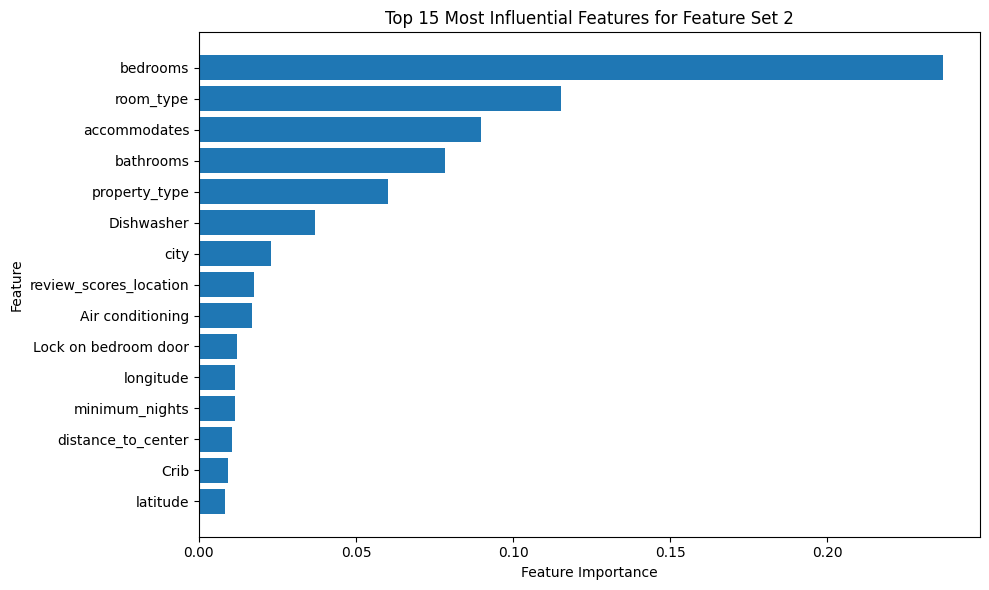

In [22]:
# Assuming df2_train.columns corresponds to the feature names for Feature Set 2
feature_names_2 = df2_train.drop(columns=['price']).columns

# Get feature importances from the trained XGBRegressor model for Feature Set 2
feature_importances_2 = best_xgb_2.feature_importances_

# Create a DataFrame to store feature names and their importance
importance_df_2 = pd.DataFrame({
    'Feature': feature_names_2,
    'Importance': feature_importances_2
}).sort_values(by='Importance', ascending=False).head(15)

# Plot the 15 most influential features for Feature Set 2
plt.figure(figsize=(10, 6))
plt.barh(importance_df_2['Feature'], importance_df_2['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Most Influential Features for Feature Set 2')
plt.gca().invert_yaxis()  # Reverse the order for a better visual effect
plt.tight_layout()
plt.show()


In [10]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Scale training data only for Feature Set 3 - TextBlob
scaler_textblob = StandardScaler()
features_train_3_textblob = scaler_textblob.fit_transform(df3_textblob_train.drop(columns=['price']))
target_train_3_textblob = df3_textblob_train['price']

# Save test data scaled for future analysis
features_test_3_textblob = scaler_textblob.transform(df3_textblob_test.drop(columns=['price']))
target_test_3_textblob = df3_textblob_test['price']

extra_test_features_3_textblob = scaler_textblob.transform(extra_test_set_feature_set3_textblob.drop(columns=['price']))
extra_test_target_3_textblob = extra_test_set_feature_set3_textblob['price']

# Linear Regression evaluation for Feature Set 3 - TextBlob
linear_model_textblob = LinearRegression()
linear_model_textblob.fit(features_train_3_textblob, target_train_3_textblob)

# Evaluate Linear Regression on Test Set 3 - TextBlob
test_3_predictions_lr_textblob = linear_model_textblob.predict(features_test_3_textblob)
test_3_rmse_lr_textblob = np.sqrt(mean_squared_error(target_test_3_textblob, test_3_predictions_lr_textblob))
test_3_r2_lr_textblob = r2_score(target_test_3_textblob, test_3_predictions_lr_textblob)

print("\nLinear Regression on Test Set 3 - TextBlob:")
print(f"RMSE: {test_3_rmse_lr_textblob:.3f}, R-squared: {test_3_r2_lr_textblob:.3f}")

# Evaluate Linear Regression on Extra Test Set for Feature Set 3 - TextBlob
extra_test_predictions_lr_3_textblob = linear_model_textblob.predict(extra_test_features_3_textblob)
extra_test_rmse_lr_3_textblob = np.sqrt(mean_squared_error(extra_test_target_3_textblob, extra_test_predictions_lr_3_textblob))
extra_test_r2_lr_3_textblob = r2_score(extra_test_target_3_textblob, extra_test_predictions_lr_3_textblob)

print("\nLinear Regression on Extra Test Set 3 - TextBlob:")
print(f"RMSE: {extra_test_rmse_lr_3_textblob:.3f}, R-squared: {extra_test_r2_lr_3_textblob:.3f}")

# Train the final XGBoost model on all training data for Feature Set 3 - TextBlob
best_xgb_3_textblob = XGBRegressor(
    learning_rate=0.1,
    max_depth=8,
    n_estimators=1200,
    subsample=1.0,
    random_state=42
)
best_xgb_3_textblob.fit(features_train_3_textblob, target_train_3_textblob)

# Evaluate XGBoost on Test Set 3 - TextBlob
test_3_predictions_textblob = best_xgb_3_textblob.predict(features_test_3_textblob)
test_3_rmse_textblob = np.sqrt(mean_squared_error(target_test_3_textblob, test_3_predictions_textblob))
test_3_r2_textblob = r2_score(target_test_3_textblob, test_3_predictions_textblob)

print("\nTest Set 3 - TextBlob:")
print(f"RMSE: {test_3_rmse_textblob:.3f}, R-squared: {test_3_r2_textblob:.3f}")

# Evaluate XGBoost on Extra Test Set for Feature Set 3 - TextBlob
extra_test_predictions_3_textblob = best_xgb_3_textblob.predict(extra_test_features_3_textblob)
extra_test_rmse_3_textblob = np.sqrt(mean_squared_error(extra_test_target_3_textblob, extra_test_predictions_3_textblob))
extra_test_r2_3_textblob = r2_score(extra_test_target_3_textblob, extra_test_predictions_3_textblob)

print("\nExtra Test Set 3 - TextBlob:")
print(f"RMSE: {extra_test_rmse_3_textblob:.3f}, R-squared: {extra_test_r2_3_textblob:.3f}")

# Save predictions and true values for error analysis for Feature Set 3 - TextBlob
error_analysis_3_textblob = {
    'test_3_textblob': pd.DataFrame({
        'true_values': target_test_3_textblob,
        'predictions': test_3_predictions_textblob
    }),
    'extra_test_3_textblob': pd.DataFrame({
        'true_values': extra_test_target_3_textblob,
        'predictions': extra_test_predictions_3_textblob
    })
}

# Save the error analysis data for further inspection
error_analysis_3_textblob['test_3_textblob'].to_csv('test_set_3_textblob_error_analysis.csv', index=False)
error_analysis_3_textblob['extra_test_3_textblob'].to_csv('extra_test_set_3_textblob_error_analysis.csv', index=False)

# Scale training data only for Feature Set 3 - VADER
scaler_vader = StandardScaler()
features_train_3_vader = scaler_vader.fit_transform(df3_vader_train.drop(columns=['price']))
target_train_3_vader = df3_vader_train['price']

# Save test data scaled for future analysis
features_test_3_vader = scaler_vader.transform(df3_vader_test.drop(columns=['price']))
target_test_3_vader = df3_vader_test['price']

extra_test_features_3_vader = scaler_vader.transform(extra_test_set_feature_set3_vader.drop(columns=['price']))
extra_test_target_3_vader = extra_test_set_feature_set3_vader['price']

# Linear Regression evaluation for Feature Set 3 - VADER
linear_model_vader = LinearRegression()
linear_model_vader.fit(features_train_3_vader, target_train_3_vader)

# Evaluate Linear Regression on Test Set 3 - VADER
test_3_predictions_lr_vader = linear_model_vader.predict(features_test_3_vader)
test_3_rmse_lr_vader = np.sqrt(mean_squared_error(target_test_3_vader, test_3_predictions_lr_vader))
test_3_r2_lr_vader = r2_score(target_test_3_vader, test_3_predictions_lr_vader)

print("\nLinear Regression on Test Set 3 - VADER:")
print(f"RMSE: {test_3_rmse_lr_vader:.3f}, R-squared: {test_3_r2_lr_vader:.3f}")

# Evaluate Linear Regression on Extra Test Set for Feature Set 3 - VADER
extra_test_predictions_lr_3_vader = linear_model_vader.predict(extra_test_features_3_vader)
extra_test_rmse_lr_3_vader = np.sqrt(mean_squared_error(extra_test_target_3_vader, extra_test_predictions_lr_3_vader))
extra_test_r2_lr_3_vader = r2_score(extra_test_target_3_vader, extra_test_predictions_lr_3_vader)

print("\nLinear Regression on Extra Test Set 3 - VADER:")
print(f"RMSE: {extra_test_rmse_lr_3_vader:.3f}, R-squared: {extra_test_r2_lr_3_vader:.3f}")

# Train the final XGBoost model on all training data for Feature Set 3 - VADER
best_xgb_3_vader = XGBRegressor(
    learning_rate=0.1,
    max_depth=8,
    n_estimators=1200,
    subsample=1.0,
    random_state=42
)
best_xgb_3_vader.fit(features_train_3_vader, target_train_3_vader)

# Evaluate XGBoost on Test Set 3 - VADER
test_3_predictions_vader = best_xgb_3_vader.predict(features_test_3_vader)
test_3_rmse_vader = np.sqrt(mean_squared_error(target_test_3_vader, test_3_predictions_vader))
test_3_r2_vader = r2_score(target_test_3_vader, test_3_predictions_vader)

print("\nTest Set 3 - VADER:")
print(f"RMSE: {test_3_rmse_vader:.3f}, R-squared: {test_3_r2_vader:.3f}")

# Evaluate XGBoost on Extra Test Set for Feature Set 3 - VADER
extra_test_predictions_3_vader = best_xgb_3_vader.predict(extra_test_features_3_vader)
extra_test_rmse_3_vader = np.sqrt(mean_squared_error(extra_test_target_3_vader, extra_test_predictions_3_vader))
extra_test_r2_3_vader = r2_score(extra_test_target_3_vader, extra_test_predictions_3_vader)

print("\nExtra Test Set 3 - VADER:")
print(f"RMSE: {extra_test_rmse_3_vader:.3f}, R-squared: {extra_test_r2_3_vader:.3f}")

# Save predictions and true values for error analysis for Feature Set 3 - VADER
error_analysis_3_vader = {
    'test_3_vader': pd.DataFrame({
        'true_values': target_test_3_vader,
        'predictions': test_3_predictions_vader
    }),
    'extra_test_3_vader': pd.DataFrame({
        'true_values': extra_test_target_3_vader,
        'predictions': extra_test_predictions_3_vader
    })
}

# Save the error analysis data for further inspection
error_analysis_3_vader['test_3_vader'].to_csv('test_set_3_vader_error_analysis.csv', index=False)
error_analysis_3_vader['extra_test_3_vader'].to_csv('extra_test_set_3_vader_error_analysis.csv', index=False)



Linear Regression on Test Set 3 - TextBlob:
RMSE: 0.449, R-squared: 0.587

Linear Regression on Extra Test Set 3 - TextBlob:
RMSE: 0.486, R-squared: 0.510

Test Set 3 - TextBlob:
RMSE: 0.309, R-squared: 0.804

Extra Test Set 3 - TextBlob:
RMSE: 0.733, R-squared: -0.115

Linear Regression on Test Set 3 - VADER:
RMSE: 0.450, R-squared: 0.586

Linear Regression on Extra Test Set 3 - VADER:
RMSE: 0.485, R-squared: 0.512

Test Set 3 - VADER:
RMSE: 0.311, R-squared: 0.802

Extra Test Set 3 - VADER:
RMSE: 0.704, R-squared: -0.028


Feature importance for set 3

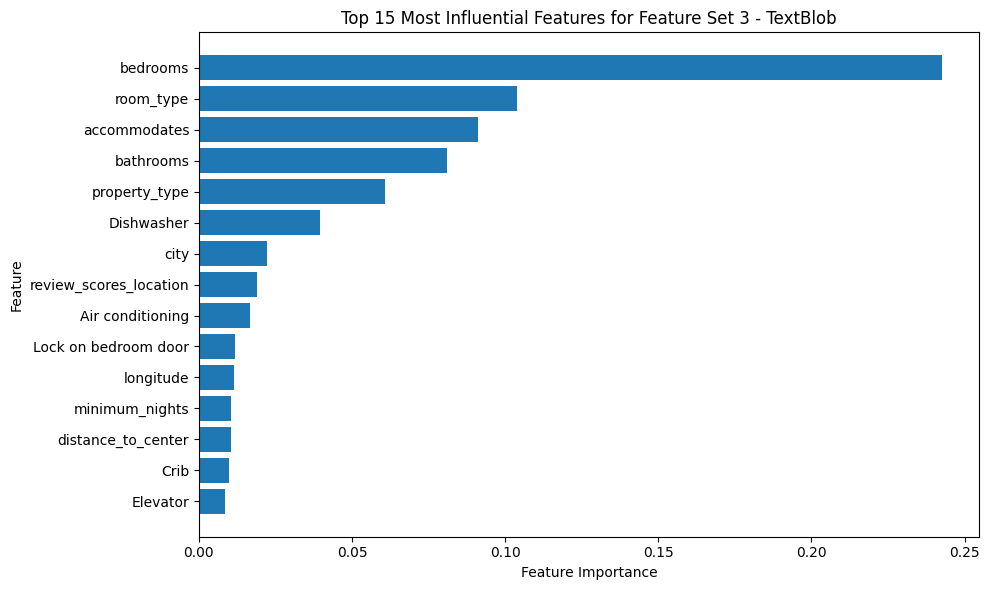

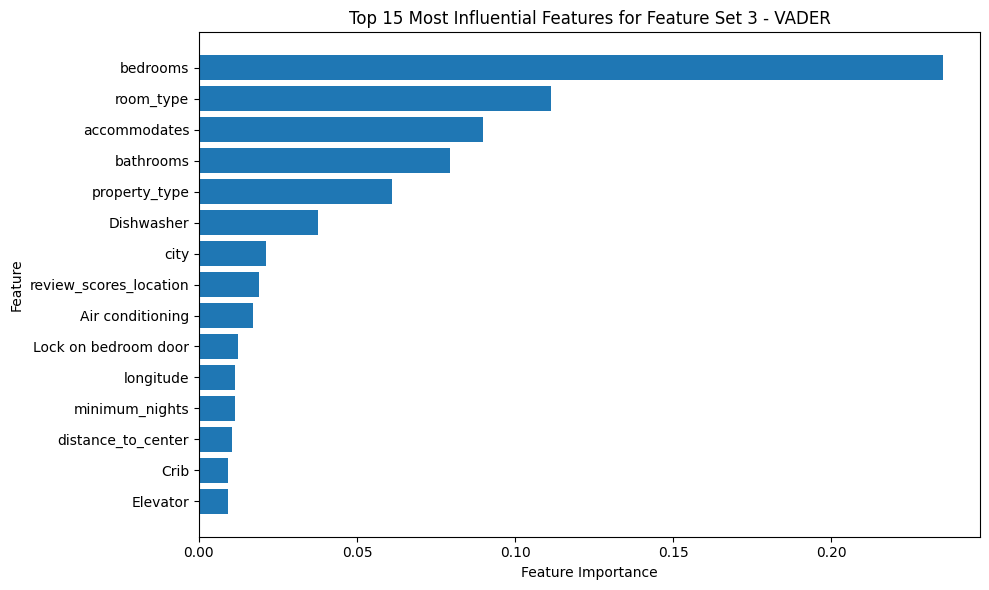

In [23]:
# Assuming df3_textblob_train and df3_vader_train.columns correspond to the feature names for Feature Set 3

# Feature importance visualization for TextBlob
feature_names_textblob = df3_textblob_train.drop(columns=['price']).columns
feature_importances_textblob = best_xgb_3_textblob.feature_importances_

importance_df_textblob = pd.DataFrame({
    'Feature': feature_names_textblob,
    'Importance': feature_importances_textblob
}).sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(importance_df_textblob['Feature'], importance_df_textblob['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Most Influential Features for Feature Set 3 - TextBlob')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Feature importance visualization for VADER
feature_names_vader = df3_vader_train.drop(columns=['price']).columns
feature_importances_vader = best_xgb_3_vader.feature_importances_

importance_df_vader = pd.DataFrame({
    'Feature': feature_names_vader,
    'Importance': feature_importances_vader
}).sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(importance_df_vader['Feature'], importance_df_vader['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Most Influential Features for Feature Set 3 - VADER')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Show error analysis

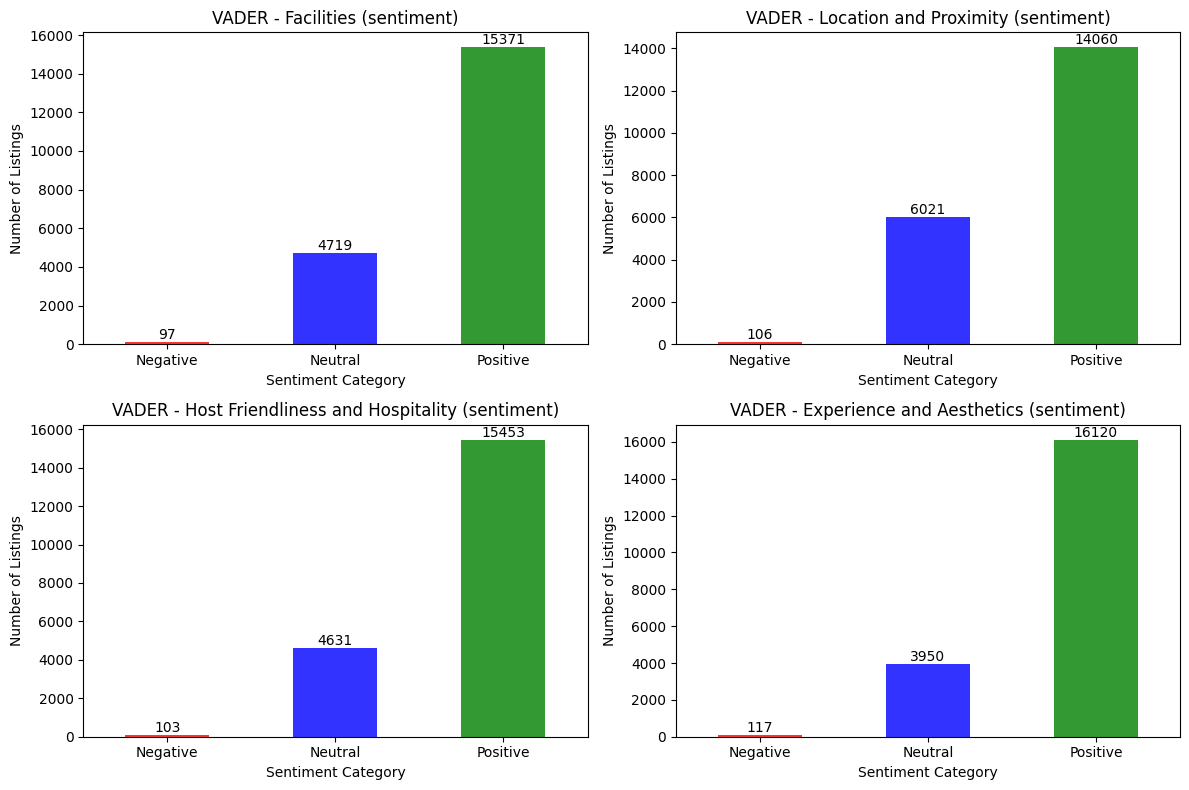

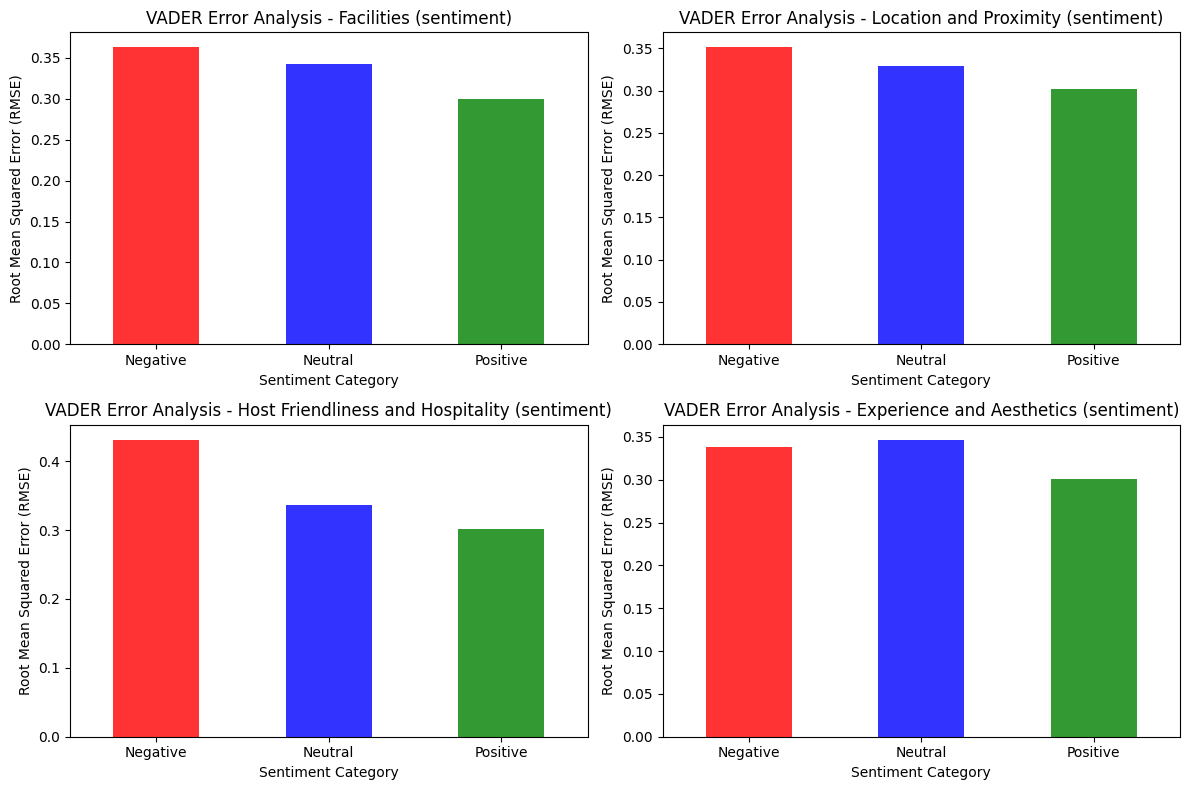

In [11]:
# Define sentiment categories based on thresholds
def categorize_sentiment(sentiment_score):
    if sentiment_score < -0.05:
        return 'Negative'
    elif sentiment_score <= 0.05:
        return 'Neutral'
    else:
        return 'Positive'

# Categorize average sentiment scores for VADER
def add_sentiment_categories_vader(data, sentiment_columns):
    for col in sentiment_columns:
        data[f'{col}_category'] = data[col].apply(categorize_sentiment)
    return data

# Rename sentiment columns
sentiment_columns = [
    'Facilities (sentiment)', 
    'Location and Proximity (sentiment)', 
    'Host Friendliness and Hospitality (sentiment)', 
    'Experience and Aesthetics (sentiment)'
]

# Rename the sentiment columns in the dataset
df3_vader_test = df3_vader_test.rename(columns={
    'topic_0_average_sentiment': 'Facilities (sentiment)', 
    'topic_1_average_sentiment': 'Location and Proximity (sentiment)', 
    'topic_2_average_sentiment': 'Host Friendliness and Hospitality (sentiment)', 
    'topic_3_average_sentiment': 'Experience and Aesthetics (sentiment)'
})

# Prepare data for error analysis with RMSE
error_analysis_3_vader['test_3_vader']['squared_error'] = (
    error_analysis_3_vader['test_3_vader']['true_values'] - error_analysis_3_vader['test_3_vader']['predictions']
) ** 2

# Merge with sentiment columns
df3_vader_test = pd.concat([df3_vader_test.reset_index(), error_analysis_3_vader['test_3_vader']], axis=1)
df3_vader_test = add_sentiment_categories_vader(df3_vader_test, sentiment_columns)

# Plot the distribution of sentiment categories
def plot_sentiment_distribution(data, sentiment_columns, title_prefix):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    
    for i, col in enumerate(sentiment_columns):
        sentiment_counts = data[f'{col}_category'].value_counts().reindex(['Negative', 'Neutral', 'Positive'], fill_value=0)
        ax = axes[i]
        sentiment_counts.plot(kind='bar', ax=ax, color=['red', 'blue', 'green'], alpha=0.8)
        ax.set_title(f'{title_prefix} - {col}')
        ax.set_xlabel('Sentiment Category')
        ax.set_ylabel('Number of Listings')
        ax.set_xticks(range(len(sentiment_counts.index)))
        ax.set_xticklabels(sentiment_counts.index, rotation=0)
        # Annotate bars with counts
        for p in ax.patches:
            ax.annotate(f"{int(p.get_height())}", 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

# Plot sentiment distributions for VADER
plot_sentiment_distribution(df3_vader_test, sentiment_columns, "VADER")

# Analyze error by sentiment categories with RMSE
def analyze_error_by_sentiment_categories(data, sentiment_columns):
    error_analysis_results = {}
    for col in sentiment_columns:
        grouped = data.groupby(f'{col}_category')['squared_error'].mean().reindex(['Negative', 'Neutral', 'Positive'], fill_value=0)
        error_analysis_results[col] = grouped.apply(np.sqrt)  # Take square root to compute RMSE
    return error_analysis_results

# Perform error analysis for VADER
vader_error_by_categories = analyze_error_by_sentiment_categories(df3_vader_test, sentiment_columns)

# Plot error analysis by sentiment categories
def plot_error_analysis_by_sentiment_categories(error_by_categories, title_prefix):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    
    for i, (col, errors) in enumerate(error_by_categories.items()):
        ax = axes[i]
        errors.plot(kind='bar', ax=ax, color=['red', 'blue', 'green'], alpha=0.8)
        ax.set_title(f'{title_prefix} - {col}')
        ax.set_xlabel('Sentiment Category')
        ax.set_ylabel('Root Mean Squared Error (RMSE)')
        ax.set_xticks(range(len(errors.index)))
        ax.set_xticklabels(errors.index, rotation=0)
    
    plt.tight_layout()
    plt.show()

# Plot error analysis for VADER with RMSE
plot_error_analysis_by_sentiment_categories(vader_error_by_categories, "VADER Error Analysis")

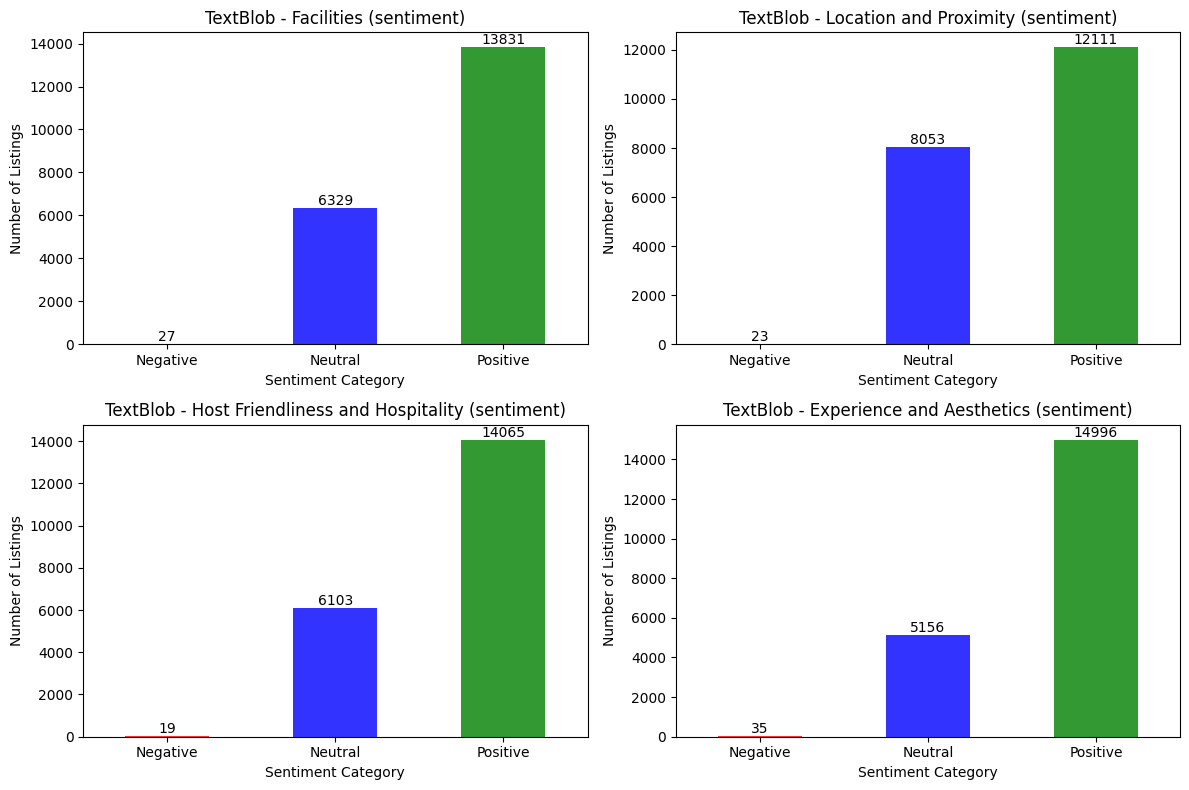

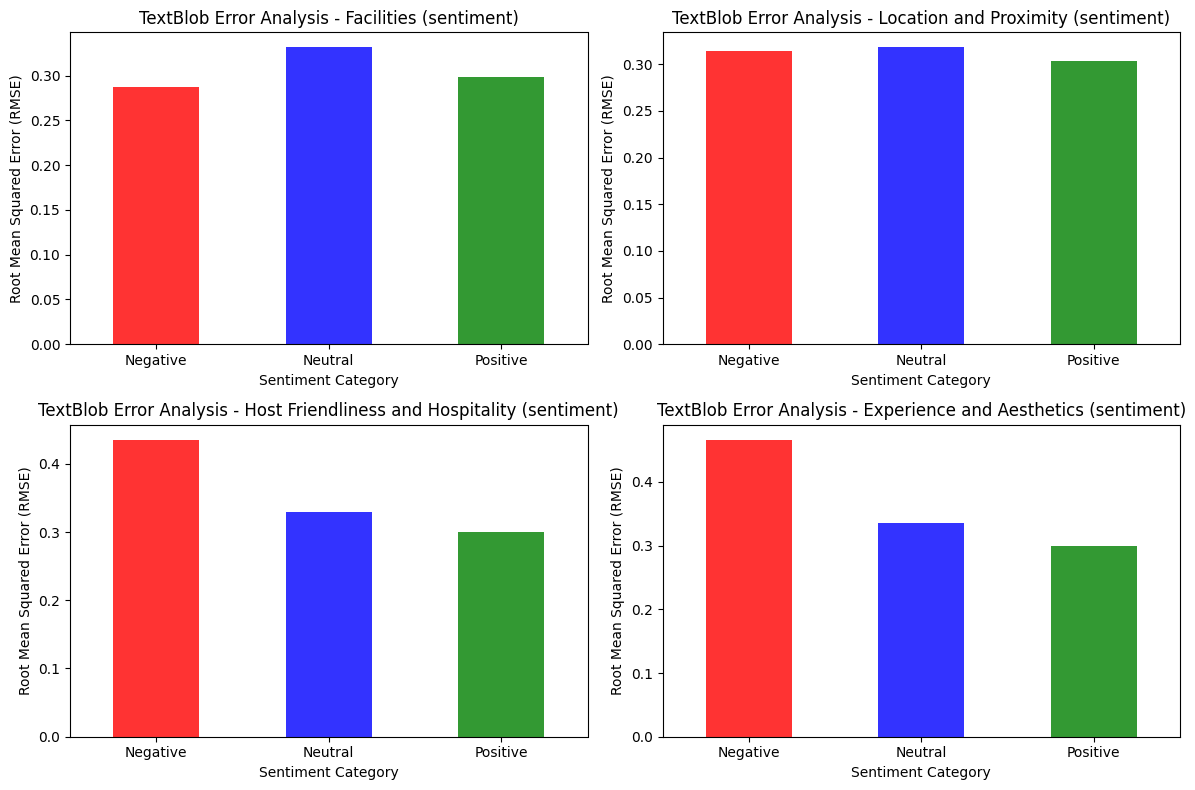

In [12]:
# Define sentiment categories based on thresholds
def categorize_sentiment(sentiment_score):
    if sentiment_score < -0.05:
        return 'Negative'
    elif sentiment_score <= 0.05:
        return 'Neutral'
    else:
        return 'Positive'

# Categorize average sentiment scores for TextBlob
def add_sentiment_categories_textblob(data, sentiment_columns):
    for col in sentiment_columns:
        data[f'{col}_category'] = data[col].apply(categorize_sentiment)
    return data

# Rename sentiment columns
sentiment_columns = [
    'Facilities (sentiment)', 
    'Location and Proximity (sentiment)', 
    'Host Friendliness and Hospitality (sentiment)', 
    'Experience and Aesthetics (sentiment)'
]

# Rename the sentiment columns in the dataset
df3_textblob_test = df3_textblob_test.rename(columns={
    'topic_0_average_sentiment': 'Facilities (sentiment)', 
    'topic_1_average_sentiment': 'Location and Proximity (sentiment)', 
    'topic_2_average_sentiment': 'Host Friendliness and Hospitality (sentiment)', 
    'topic_3_average_sentiment': 'Experience and Aesthetics (sentiment)'
})

# Prepare data for error analysis with RMSE
error_analysis_3_textblob['test_3_textblob']['squared_error'] = (
    error_analysis_3_textblob['test_3_textblob']['true_values'] - error_analysis_3_textblob['test_3_textblob']['predictions']
) ** 2

# Merge with sentiment columns
df3_textblob_test = pd.concat([df3_textblob_test.reset_index(), error_analysis_3_textblob['test_3_textblob']], axis=1)
df3_textblob_test = add_sentiment_categories_textblob(df3_textblob_test, sentiment_columns)

# Plot the distribution of sentiment categories
def plot_sentiment_distribution(data, sentiment_columns, title_prefix):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    
    for i, col in enumerate(sentiment_columns):
        sentiment_counts = data[f'{col}_category'].value_counts().reindex(['Negative', 'Neutral', 'Positive'], fill_value=0)
        ax = axes[i]
        sentiment_counts.plot(kind='bar', ax=ax, color=['red', 'blue', 'green'], alpha=0.8)
        ax.set_title(f'{title_prefix} - {col}')
        ax.set_xlabel('Sentiment Category')
        ax.set_ylabel('Number of Listings')
        ax.set_xticks(range(len(sentiment_counts.index)))
        ax.set_xticklabels(sentiment_counts.index, rotation=0)
        # Annotate bars with counts
        for p in ax.patches:
            ax.annotate(f"{int(p.get_height())}", 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

# Plot sentiment distributions for TextBlob
plot_sentiment_distribution(df3_textblob_test, sentiment_columns, "TextBlob")

# Analyze error by sentiment categories with RMSE
def analyze_error_by_sentiment_categories(data, sentiment_columns):
    error_analysis_results = {}
    for col in sentiment_columns:
        grouped = data.groupby(f'{col}_category')['squared_error'].mean().reindex(['Negative', 'Neutral', 'Positive'], fill_value=0)
        error_analysis_results[col] = grouped.apply(np.sqrt)  # Take square root to compute RMSE
    return error_analysis_results

# Perform error analysis for TextBlob
textblob_error_by_categories = analyze_error_by_sentiment_categories(df3_textblob_test, sentiment_columns)

# Plot error analysis by sentiment categories
def plot_error_analysis_by_sentiment_categories(error_by_categories, title_prefix):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    
    for i, (col, errors) in enumerate(error_by_categories.items()):
        ax = axes[i]
        errors.plot(kind='bar', ax=ax, color=['red', 'blue', 'green'], alpha=0.8)
        ax.set_title(f'{title_prefix} - {col}')
        ax.set_xlabel('Sentiment Category')
        ax.set_ylabel('Root Mean Squared Error (RMSE)')
        ax.set_xticks(range(len(errors.index)))
        ax.set_xticklabels(errors.index, rotation=0)
    
    plt.tight_layout()
    plt.show()

# Plot error analysis for TextBlob with RMSE
plot_error_analysis_by_sentiment_categories(textblob_error_by_categories, "TextBlob Error Analysis")



In [14]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Scale training data only for Feature Set 4 - TextBlob
scaler_textblob = StandardScaler()
features_train_4_textblob = scaler_textblob.fit_transform(df4_textblob_train.drop(columns=['price']))
target_train_4_textblob = df4_textblob_train['price']

# Save test data scaled for future analysis
features_test_4_textblob = scaler_textblob.transform(df4_textblob_test.drop(columns=['price']))
target_test_4_textblob = df4_textblob_test['price']

extra_test_features_4_textblob = scaler_textblob.transform(extra_test_set_feature_set4_textblob.drop(columns=['price']))
extra_test_target_4_textblob = extra_test_set_feature_set4_textblob['price']

# Linear Regression evaluation for Feature Set 4 - TextBlob
linear_model_textblob = LinearRegression()
linear_model_textblob.fit(features_train_4_textblob, target_train_4_textblob)

# Evaluate Linear Regression on Test Set 4 - TextBlob
test_4_predictions_lr_textblob = linear_model_textblob.predict(features_test_4_textblob)
test_4_rmse_lr_textblob = np.sqrt(mean_squared_error(target_test_4_textblob, test_4_predictions_lr_textblob))
test_4_r2_lr_textblob = r2_score(target_test_4_textblob, test_4_predictions_lr_textblob)

print("\nLinear Regression on Test Set 4 - TextBlob:")
print(f"RMSE: {test_4_rmse_lr_textblob:.3f}, R-squared: {test_4_r2_lr_textblob:.3f}")

# Evaluate Linear Regression on Extra Test Set for Feature Set 4 - TextBlob
extra_test_predictions_lr_4_textblob = linear_model_textblob.predict(extra_test_features_4_textblob)
extra_test_rmse_lr_4_textblob = np.sqrt(mean_squared_error(extra_test_target_4_textblob, extra_test_predictions_lr_4_textblob))
extra_test_r2_lr_4_textblob = r2_score(extra_test_target_4_textblob, extra_test_predictions_lr_4_textblob)

print("\nLinear Regression on Extra Test Set 4 - TextBlob:")
print(f"RMSE: {extra_test_rmse_lr_4_textblob:.3f}, R-squared: {extra_test_r2_lr_4_textblob:.3f}")

# Train the final XGBoost model on all training data for Feature Set 4 - TextBlob
best_xgb_4_textblob = XGBRegressor(
    learning_rate=0.01,
    max_depth=8,
    n_estimators=1200,
    subsample=0.8,
    random_state=42
)
best_xgb_4_textblob.fit(features_train_4_textblob, target_train_4_textblob)

# Evaluate XGBoost on Test Set 4 - TextBlob
test_4_predictions_textblob = best_xgb_4_textblob.predict(features_test_4_textblob)
test_4_rmse_textblob = np.sqrt(mean_squared_error(target_test_4_textblob, test_4_predictions_textblob))
test_4_r2_textblob = r2_score(target_test_4_textblob, test_4_predictions_textblob)

print("\nTest Set 4 - TextBlob:")
print(f"RMSE: {test_4_rmse_textblob:.3f}, R-squared: {test_4_r2_textblob:.3f}")

# Evaluate XGBoost on Extra Test Set for Feature Set 4 - TextBlob
extra_test_predictions_4_textblob = best_xgb_4_textblob.predict(extra_test_features_4_textblob)
extra_test_rmse_4_textblob = np.sqrt(mean_squared_error(extra_test_target_4_textblob, extra_test_predictions_4_textblob))
extra_test_r2_4_textblob = r2_score(extra_test_target_4_textblob, extra_test_predictions_4_textblob)

print("\nExtra Test Set 4 - TextBlob:")
print(f"RMSE: {extra_test_rmse_4_textblob:.3f}, R-squared: {extra_test_r2_4_textblob:.3f}")

# Save predictions and true values for error analysis for Feature Set 4 - TextBlob
error_analysis_4_textblob = {
    'test_4_textblob': pd.DataFrame({
        'true_values': target_test_4_textblob,
        'predictions': test_4_predictions_textblob
    }),
    'extra_test_4_textblob': pd.DataFrame({
        'true_values': extra_test_target_4_textblob,
        'predictions': extra_test_predictions_4_textblob
    })
}

# Save the error analysis data for further inspection
error_analysis_4_textblob['test_4_textblob'].to_csv('test_set_4_textblob_error_analysis.csv', index=False)
error_analysis_4_textblob['extra_test_4_textblob'].to_csv('extra_test_set_4_textblob_error_analysis.csv', index=False)

# Scale training data only for Feature Set 4 - VADER
scaler_vader = StandardScaler()
features_train_4_vader = scaler_vader.fit_transform(df4_vader_train.drop(columns=['price']))
target_train_4_vader = df4_vader_train['price']

# Save test data scaled for future analysis
features_test_4_vader = scaler_vader.transform(df4_vader_test.drop(columns=['price']))
target_test_4_vader = df4_vader_test['price']

extra_test_features_4_vader = scaler_vader.transform(extra_test_set_feature_set4_vader.drop(columns=['price']))
extra_test_target_4_vader = extra_test_set_feature_set4_vader['price']

# Linear Regression evaluation for Feature Set 4 - VADER
linear_model_vader = LinearRegression()
linear_model_vader.fit(features_train_4_vader, target_train_4_vader)

# Evaluate Linear Regression on Test Set 4 - VADER
test_4_predictions_lr_vader = linear_model_vader.predict(features_test_4_vader)
test_4_rmse_lr_vader = np.sqrt(mean_squared_error(target_test_4_vader, test_4_predictions_lr_vader))
test_4_r2_lr_vader = r2_score(target_test_4_vader, test_4_predictions_lr_vader)

print("\nLinear Regression on Test Set 4 - VADER:")
print(f"RMSE: {test_4_rmse_lr_vader:.3f}, R-squared: {test_4_r2_lr_vader:.3f}")

# Evaluate Linear Regression on Extra Test Set for Feature Set 4 - VADER
extra_test_predictions_lr_4_vader = linear_model_vader.predict(extra_test_features_4_vader)
extra_test_rmse_lr_4_vader = np.sqrt(mean_squared_error(extra_test_target_4_vader, extra_test_predictions_lr_4_vader))
extra_test_r2_lr_4_vader = r2_score(extra_test_target_4_vader, extra_test_predictions_lr_4_vader)

print("\nLinear Regression on Extra Test Set 4 - VADER:")
print(f"RMSE: {extra_test_rmse_lr_4_vader:.3f}, R-squared: {extra_test_r2_lr_4_vader:.3f}")

# Train the final XGBoost model on all training data for Feature Set 4 - VADER
best_xgb_4_vader = XGBRegressor(
    learning_rate=0.01,
    max_depth=8,
    n_estimators=1200,
    subsample=0.8,
    random_state=42
)
best_xgb_4_vader.fit(features_train_4_vader, target_train_4_vader)

# Evaluate XGBoost on Test Set 4 - VADER
test_4_predictions_vader = best_xgb_4_vader.predict(features_test_4_vader)
test_4_rmse_vader = np.sqrt(mean_squared_error(target_test_4_vader, test_4_predictions_vader))
test_4_r2_vader = r2_score(target_test_4_vader, test_4_predictions_vader)

print("\nTest Set 4 - VADER:")
print(f"RMSE: {test_4_rmse_vader:.3f}, R-squared: {test_4_r2_vader:.3f}")

# Evaluate XGBoost on Extra Test Set for Feature Set 4 - VADER
extra_test_predictions_4_vader = best_xgb_4_vader.predict(extra_test_features_4_vader)
extra_test_rmse_4_vader = np.sqrt(mean_squared_error(extra_test_target_4_vader, extra_test_predictions_4_vader))
extra_test_r2_4_vader = r2_score(extra_test_target_4_vader, extra_test_predictions_4_vader)

print("\nExtra Test Set 4 - VADER:")
print(f"RMSE: {extra_test_rmse_4_vader:.3f}, R-squared: {extra_test_r2_4_vader:.3f}")

# Save predictions and true values for error analysis for Feature Set 4 - VADER
error_analysis_4_vader = {
    'test_4_vader': pd.DataFrame({
        'true_values': target_test_4_vader,
        'predictions': test_4_predictions_vader
    }),
    'extra_test_4_vader': pd.DataFrame({
        'true_values': extra_test_target_4_vader,
        'predictions': extra_test_predictions_4_vader
    })
}

# Save the error analysis data for further inspection
error_analysis_4_vader['test_4_vader'].to_csv('test_set_4_vader_error_analysis.csv', index=False)
error_analysis_4_vader['extra_test_4_vader'].to_csv('extra_test_set_4_vader_error_analysis.csv', index=False)



Linear Regression on Test Set 4 - TextBlob:
RMSE: 0.669, R-squared: 0.084

Linear Regression on Extra Test Set 4 - TextBlob:
RMSE: 0.776, R-squared: -0.250

Test Set 4 - TextBlob:
RMSE: 0.628, R-squared: 0.194

Extra Test Set 4 - TextBlob:
RMSE: 0.722, R-squared: -0.082

Linear Regression on Test Set 4 - VADER:
RMSE: 0.673, R-squared: 0.074

Linear Regression on Extra Test Set 4 - VADER:
RMSE: 0.778, R-squared: -0.257

Test Set 4 - VADER:
RMSE: 0.636, R-squared: 0.173

Extra Test Set 4 - VADER:
RMSE: 0.725, R-squared: -0.090


Show feature importance for feature set 4

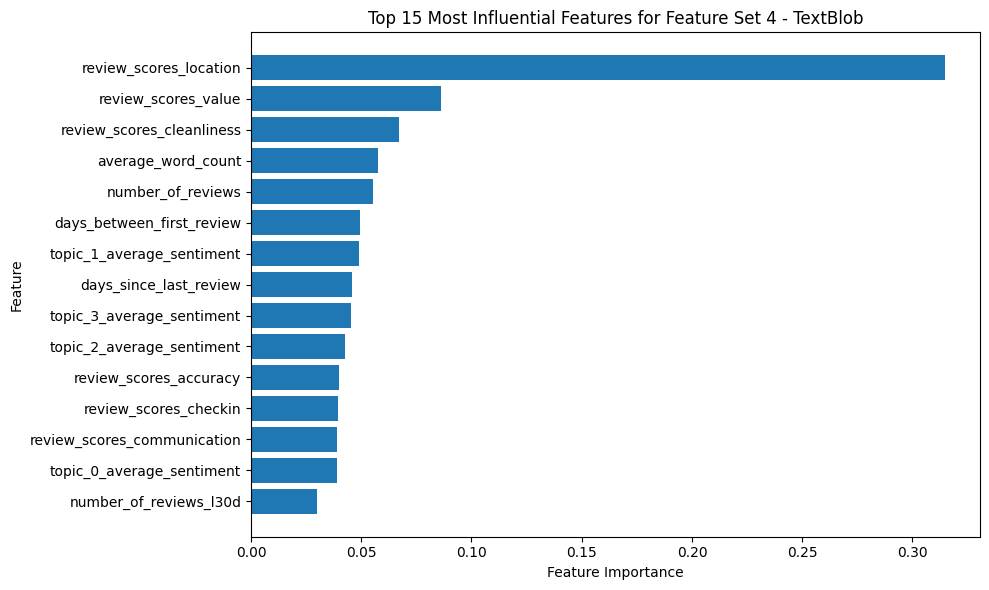

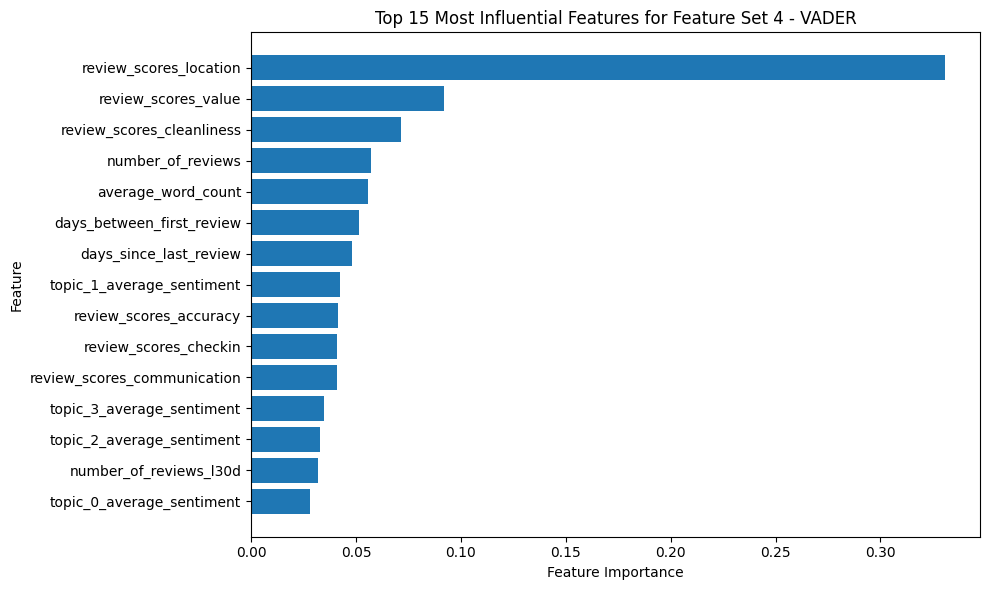

In [24]:
# Feature importance analysis for Feature Set 4 - TextBlob
feature_names_4_textblob = df4_textblob_train.drop(columns=['price']).columns
feature_importances_4_textblob = best_xgb_4_textblob.feature_importances_

# Create a DataFrame for feature importance
importance_df_4_textblob = pd.DataFrame({
    'Feature': feature_names_4_textblob,
    'Importance': feature_importances_4_textblob
}).sort_values(by='Importance', ascending=False).head(15)

# Plot the top 15 most influential features for Feature Set 4 - TextBlob
plt.figure(figsize=(10, 6))
plt.barh(importance_df_4_textblob['Feature'], importance_df_4_textblob['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Most Influential Features for Feature Set 4 - TextBlob')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Feature importance analysis for Feature Set 4 - VADER
feature_names_4_vader = df4_vader_train.drop(columns=['price']).columns
feature_importances_4_vader = best_xgb_4_vader.feature_importances_

# Create a DataFrame for feature importance
importance_df_4_vader = pd.DataFrame({
    'Feature': feature_names_4_vader,
    'Importance': feature_importances_4_vader
}).sort_values(by='Importance', ascending=False).head(15)

# Plot the top 15 most influential features for Feature Set 4 - VADER
plt.figure(figsize=(10, 6))
plt.barh(importance_df_4_vader['Feature'], importance_df_4_vader['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Most Influential Features for Feature Set 4 - VADER')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



Error analysis standard test sets compared to additional test sets

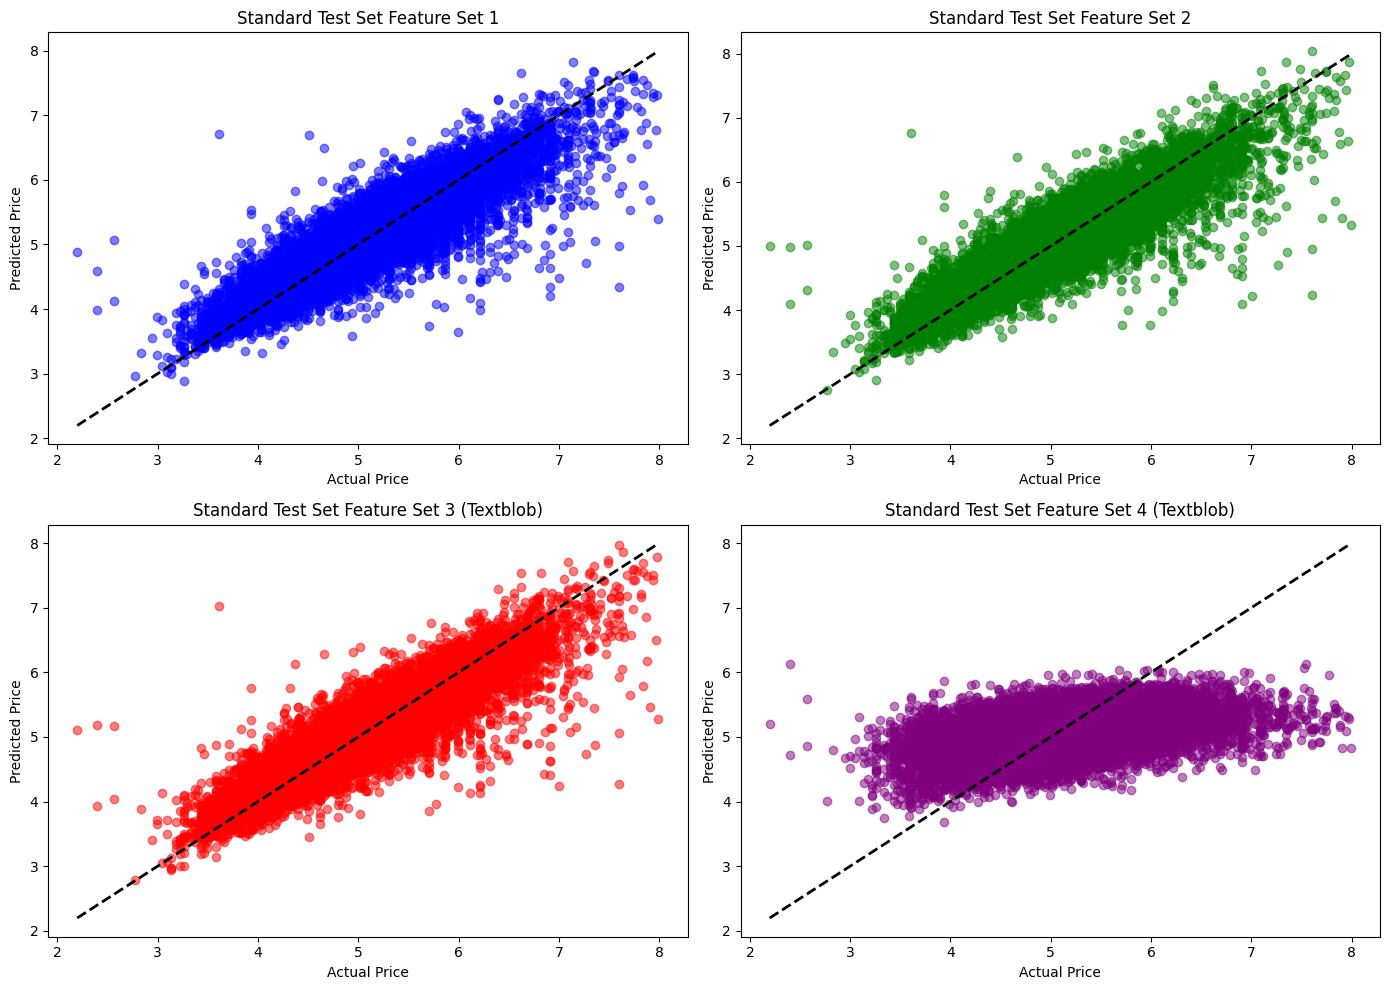

In [20]:
# Function to generate scatter plots with different colors
def generate_subplot(data, title, ax, color):
    ax.scatter(data['true_values'], data['predictions'], alpha=0.5, color=color, label=title)
    ax.plot([data['true_values'].min(), data['true_values'].max()],
            [data['true_values'].min(), data['true_values'].max()],
            'k--', lw=2)
    ax.set_title(title)
    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')

# Prepare the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Generate subplots for each normal test set with distinct colors
generate_subplot(error_analysis['test_1'], 'Standard Test Set Feature Set 1', axs[0, 0], 'blue')
generate_subplot(error_analysis_2['test_2'], 'Standard Test Set Feature Set 2', axs[0, 1], 'green')
generate_subplot(error_analysis_3_textblob['test_3_textblob'], 'Standard Test Set Feature Set 3 (Textblob)', axs[1, 0], 'red')
generate_subplot(error_analysis_4_textblob['test_4_textblob'], 'Standard Test Set Feature Set 4 (Textblob)', axs[1, 1], 'purple')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


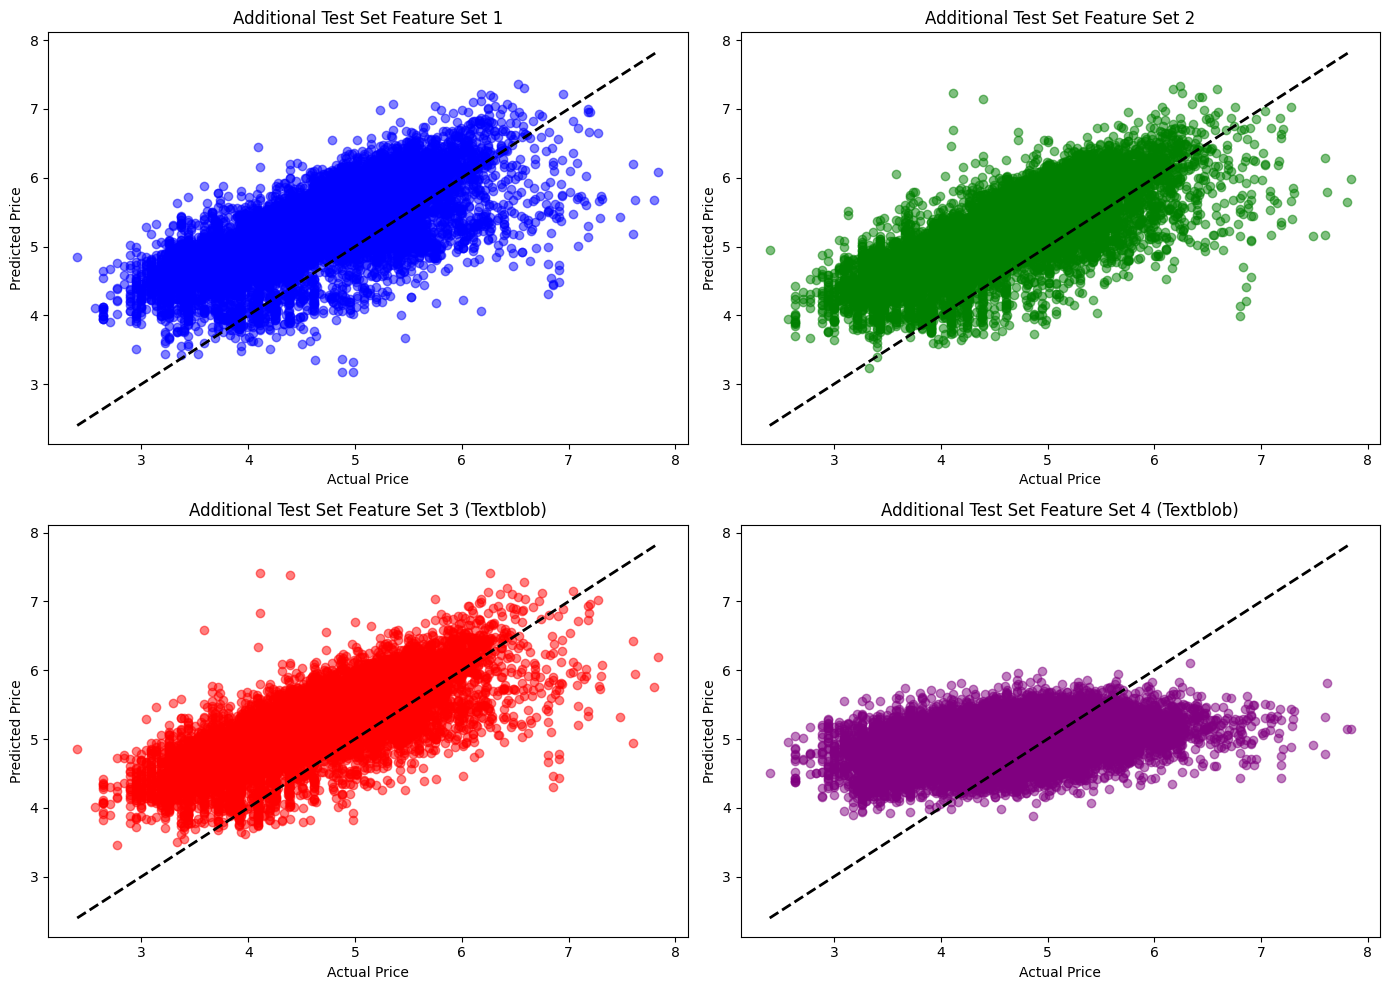

In [19]:
# Function to generate scatter plots with different colors
def generate_subplot(data, title, ax, color):
    ax.scatter(data['true_values'], data['predictions'], alpha=0.5, color=color, label=title)
    ax.plot([data['true_values'].min(), data['true_values'].max()],
            [data['true_values'].min(), data['true_values'].max()],
            'k--', lw=2)
    ax.set_title(title)
    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')

# Prepare the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Generate subplots for each extra test set with distinct colors
generate_subplot(error_analysis['extra_test'], 'Additional Test Set Feature Set 1', axs[0, 0], 'blue')
generate_subplot(error_analysis_2['extra_test_2'], 'Additional Test Set Feature Set 2', axs[0, 1], 'green')
generate_subplot(error_analysis_3_textblob['extra_test_3_textblob'], 'Additional Test Set Feature Set 3 (Textblob)', axs[1, 0], 'red')
generate_subplot(error_analysis_4_textblob['extra_test_4_textblob'], 'Additional Test Set Feature Set 4 (Textblob)', axs[1, 1], 'purple')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
